In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set()

## Wczytujemy dane
Pierwsza kolumna pliku z danymi zawiera informacje o dacie i czasie obserwacji a więc możemy ją wykorztstać to utworzenia indeksu (`index_col=0`). Piąty wiersz to w istocie nagłowek danych (`header=5`):

In [5]:
pm25_2018 = pd.read_excel('data/2018/2018_PM25_1g.xlsx', header=5, index_col=0)
pm25_2018.head(3)

,DsJelGorOgin-PM2.5-1g,DsWrocAlWisn-PM2.5-1g,DsWrocWybCon-PM2.5-1g,KpBydPlPozna-PM2.5-1g,KpBydWarszaw-PM2.5-1g,KpToruDziewu-PM2.5-1g,KpWloclOkrze-PM2.5-1g,LbLubObywate-PM2.5-1g,LdLodzCzerni-PM2.5-1g,LdLodzGdansk-PM2.5-1g,...,SkKonsGranatMOB-PM2.5-1g,SkPolaRuszcz-PM2.5-1g,SlBielPartyz-PM2.5-1g,SlKatoKossut-PM2.5-1g,SlZlotPotLes-PM2.5-1g,WmOlsPuszkin-PM2.5-1g,WpKaliSawick-PM2.5-1g,WpPoznDabrow-PM2.5-1g,ZpSzczAndr01-PM2.5-1g,ZpSzczPils02-PM2.5-1g
Czas pomiaru,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,"43,0102","71,494","70,2","49,2716","69,6873","18,778",NaN,"30,9","16,0","68,349",...,NaN,"27,68",NaN,"76,8469","25,9266","41,3687",NaN,NaN,"26,5445","12,8035"
2018-01-01 02:00:00,"5,38425","7,89305","13,1522","36,236","42,3178",NaN,NaN,"54,8","83,0","39,999",...,NaN,"18,48",NaN,"39,3395","32,7522","25,8502",NaN,NaN,NaN,NaN
2018-01-01 03:00:00,"4,52882","12,5392","12,5","14,7514",NaN,NaN,NaN,"24,3","16,0","17,949",...,NaN,"15,59",NaN,"23,2554","37,6664","22,4599",NaN,NaN,"10,4332","32,0944"


## Porządkujemy dane
##### Wybieramy stacje pomiarowe z interesującego nas obszaru Polski:

In [101]:
def select_columns_by_name(df, name):
    idxs = pd.Series(df.columns).str.match(name)
    idxs = idxs[idxs == True].index.sort_values()
    return df.iloc[:, idxs]

df_warsaw = select_columns_by_name(pm25_2018, 'MzWar')

In [103]:
df_warsaw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-01-01 01:00:00 to 2019-01-01 00:00:00
Data columns (total 4 columns):
MzWarAlNiepo-PM2.5-1g    8700 non-null object
MzWarKondrat-PM2.5-1g    8587 non-null object
MzWarTolstoj-PM2.5-1g    8251 non-null object
MzWarWokalna-PM2.5-1g    8530 non-null object
dtypes: object(4)
memory usage: 342.2+ KB


Jak widać, dane przechowywane są jako ciągi znaków (`MzWarAlNiepo-PM2.5-1g    8700 non-null object`). Do naszych analiz niezbędna jest konwersja do postaci numerycznej (`float`):

In [89]:
for col in df_warsaw.select_dtypes(include=[object]).columns:
    df_warsaw[col] = df_warsaw[col].replace(',', '.', regex=True).astype(float)

In [90]:
df_warsaw.describe()

,MzWarAlNiepo-PM2.5-1g,MzWarKondrat-PM2.5-1g,MzWarTolstoj-PM2.5-1g,MzWarWokalna-PM2.5-1g
count,8700.000000,8587.000000,8251.000000,8530.000000
mean,24.855434,22.478208,23.327789,22.002741
std,17.304248,18.789784,17.447917,14.683713
min,0.877018,1.031395,0.860000,3.280000
25%,12.443089,9.956930,10.860000,11.240000
50%,19.637732,17.022979,18.630000,18.065000
75%,31.932375,28.427829,30.100000,28.195000
max,136.482375,256.028970,142.960000,118.890000


### Brakujące wartości:
W nszych danych występują obserwacje, które nie mają przypisanej wartości:

In [91]:
df_warsaw.isnull().sum()

MzWarAlNiepo-PM2.5-1g     60
MzWarKondrat-PM2.5-1g    173
MzWarTolstoj-PM2.5-1g    509
MzWarWokalna-PM2.5-1g    230
dtype: int64

In [110]:
df_warsaw[df_warsaw.isnull().any(axis=1)].head(6)

,MzWarAlNiepo-PM2.5-1g,MzWarKondrat-PM2.5-1g,MzWarTolstoj-PM2.5-1g,MzWarWokalna-PM2.5-1g
Czas pomiaru,,,,
2018-01-02 01:00:00,NaN,"25,824548","27,6","35,01"
2018-01-14 19:00:00,"24,555589","20,246088","21,79",NaN
2018-02-03 10:00:00,"50,693089",NaN,"31,3","40,71"
2018-02-03 11:00:00,"48,507375",NaN,"36,6","40,02"
2018-02-03 12:00:00,"51,057375",NaN,"36,6","40,5"
2018-02-03 13:00:00,"53,698446",NaN,"36,8","40,68"


Wykorzystam dostępną w *Pandas* metodę `interpolate()` do uzupełnienia brakujących danych:

In [84]:
df_interpol = df_warsaw.interpolate(method='linear', axis=1, limit_direction='both')

In [111]:
df_interpol[df_warsaw.isna().any(axis=1)].head(6)

,MzWarAlNiepo-PM2.5-1g,MzWarKondrat-PM2.5-1g,MzWarTolstoj-PM2.5-1g,MzWarWokalna-PM2.5-1g
Czas pomiaru,,,,
2018-01-02 01:00:00,25.824548,25.824548,27.60,35.01
2018-01-14 19:00:00,24.555589,20.246088,21.79,21.79
2018-02-03 10:00:00,50.693089,40.996544,31.30,40.71
2018-02-03 11:00:00,48.507375,42.553688,36.60,40.02
2018-02-03 12:00:00,51.057375,43.828688,36.60,40.50
2018-02-03 13:00:00,53.698446,45.249223,36.80,40.68


In [112]:
df_interpol.describe()

,MzWarAlNiepo-PM2.5-1g,MzWarKondrat-PM2.5-1g,MzWarTolstoj-PM2.5-1g,MzWarWokalna-PM2.5-1g
count,8759.000000,8759.000000,8759.000000,8759.000000
mean,24.831244,22.463911,23.024636,21.848154
std,17.369127,18.663370,17.307076,14.592759
min,0.877018,1.031395,0.860000,3.280000
25%,12.352018,9.956930,10.650000,11.180000
50%,19.546661,17.146944,18.160000,17.940000
75%,31.932375,28.427829,29.770000,27.960000
max,136.482375,256.028970,142.960000,118.890000


## Eksploracja danych
##### Histogramy

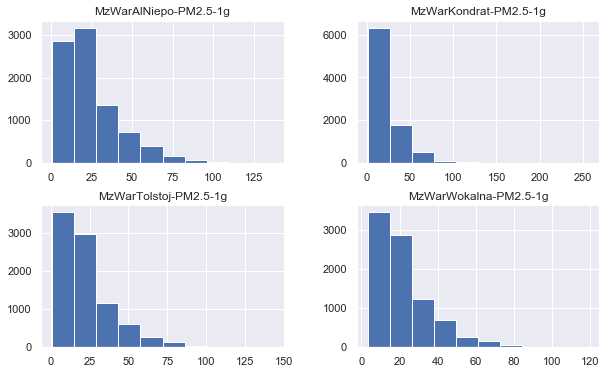

In [220]:
df_interpol.hist(figsize=(10, 6));

##### Wykres liniowy uśrednionych pomiarów miesięcznych

<Figure size 1080x432 with 0 Axes>

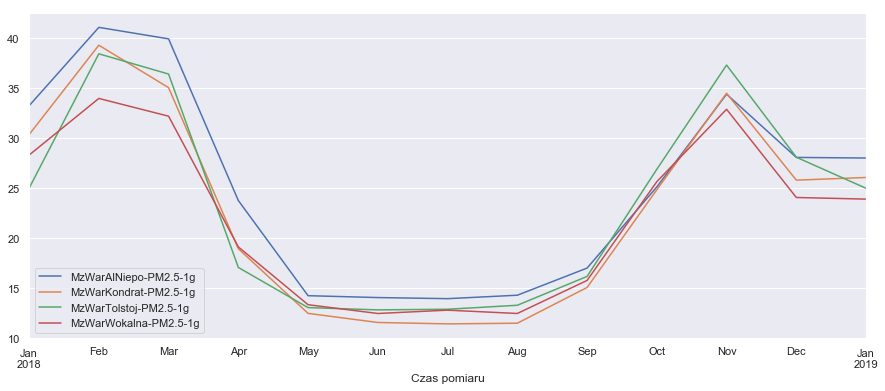

In [157]:
plt.figure(figsize=(15, 6))
df_interpol.resample('M').mean().plot(figsize=(15, 6));

##### Wykresy pudełkowe uśrednionych obserwacji dziennych, w poszczególnych miesiącach

In [212]:
monthly = df_interpol.resample('d').mean()
monthly['month'] = monthly.index.strftime('%B')
monthly.head(5)

,MzWarAlNiepo-PM2.5-1g,MzWarKondrat-PM2.5-1g,MzWarTolstoj-PM2.5-1g,MzWarWokalna-PM2.5-1g,month
Czas pomiaru,,,,,
2018-01-01,25.593012,23.442249,20.259130,23.246522,January
2018-01-02,46.002659,38.851284,34.268333,38.283750,January
2018-01-03,22.627911,18.061192,17.432500,19.233750,January
2018-01-04,14.108938,10.091226,10.988333,12.565417,January
2018-01-05,18.412062,15.024031,14.119167,16.033750,January


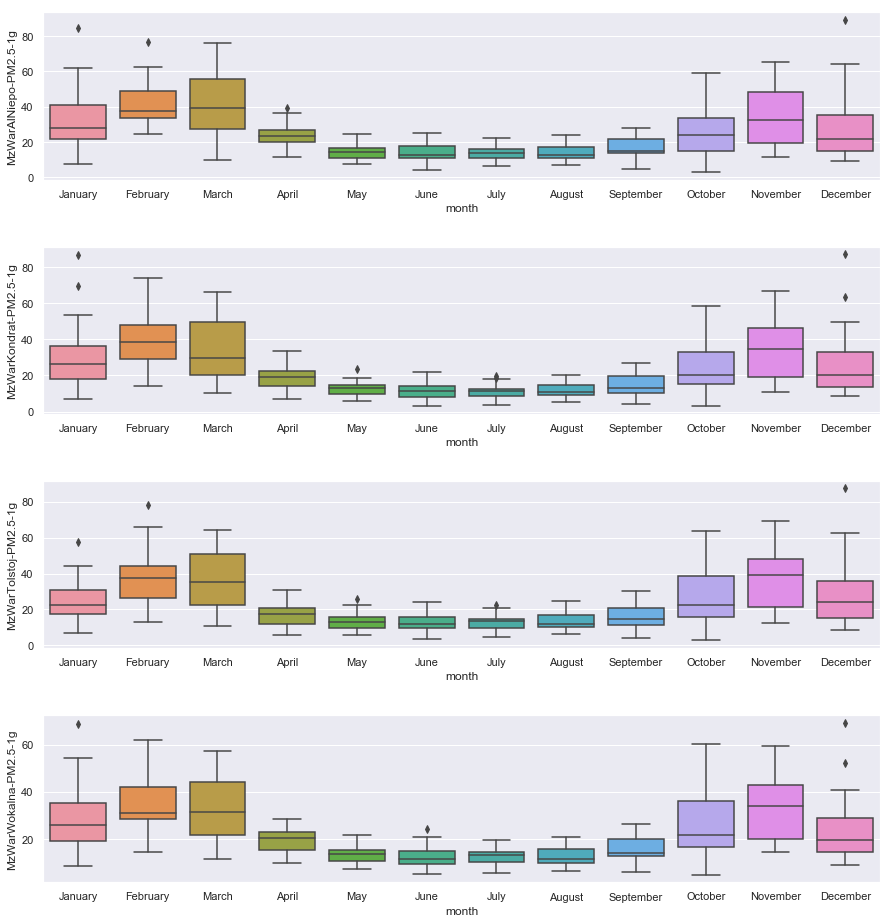

In [257]:
f_box = plt.figure(figsize=(15, 16))
f_box.subplots_adjust(hspace=0.4)
for i in range(4):
    ax = f_box.add_subplot(4, 1, i+1)
    ax = sns.boxplot(data=monthly, x=monthly['month'], y=monthly.iloc[:, i])

##### Wykres dobowych, uśrednionych pomiarów godzinowych:

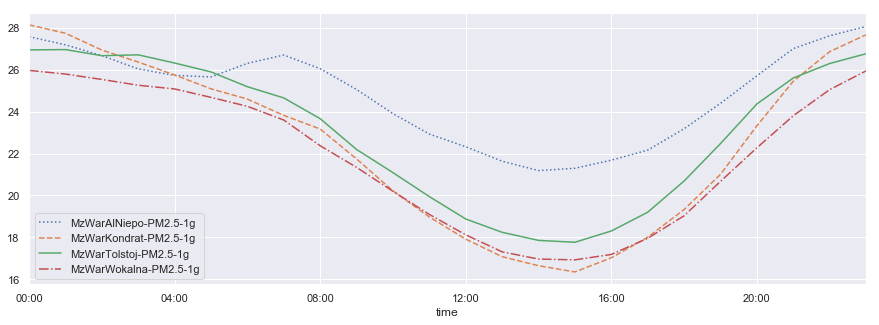

In [323]:
by_day_time = df_interpol.groupby(df_interpol.index.time).mean()
by_day_time.plot(figsize=(15, 5), xticks=by_day_time.index[::4], style=[':', '--', '-', '-.']);

##### Wykres uśrednionych pomiarów dziennych w skali tygodnia:

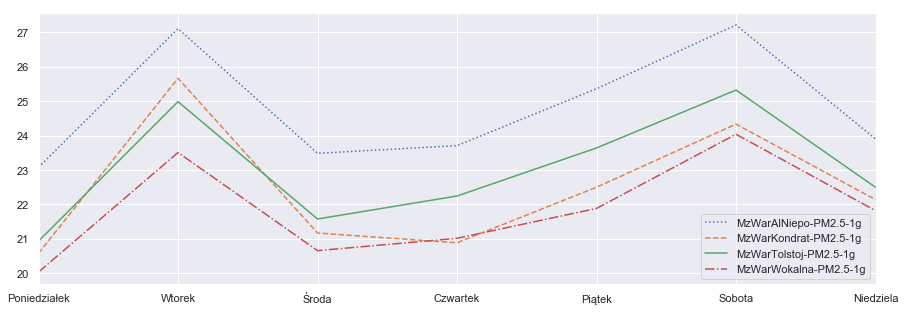

In [332]:
by_day_of_week = df_interpol.groupby(df_interpol.index.dayofweek).mean()
by_day_of_week.index = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
by_day_of_week.plot(figsize=(15, 5), style=[':', '--', '-', '-.']);